In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pylab import rcParams
from sklearn.model_selection import TimeSeriesSplit
import holidays
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from statsmodels.tools.eval_measures import rmse
from prophet.plot import add_changepoints_to_plot
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/Othercomputers/My Mac/Final Project/Time-Series-Forecasting/data/cleaned_04.csv')

In [ ]:
df.head()

,order_id,country,date,CreatedAt,category,payment,gender,age,color,size,...,week_of_year,price_difference,morning,afternoon,evening,total_sales_country_product,avg_sales_country_product,total_sales_country_product_month,avg_sales_country_product_day,average_price
0,20000001,Romania,2020-01-01,2020-01-01 09:48:00,"{'football': 2, 'Not Applicable': 1}",{'COD': 3},"{'unisex': 2, 'Not Applicable': 1}","{'adults': 2, 'Not Applicable': 1}","{'White': 1, 'Black': 1, 'Not Applicable': 1}","{'39-42': 2, 'Not Applicable': 1}",...,1,-3.02,1,0,0,4920601.04,40.09,410685.96,40.42,6.403744
1,21000001,Italy,2021-01-01,2021-01-01 21:26:00,"{'fitness': 1, 'Not Applicable': 1}",{'PAYPAL': 2},"{'unisex': 1, 'Not Applicable': 1}","{'adults': 1, 'Not Applicable': 1}","{'Purple': 1, 'Not Applicable': 1}","{'OSFA': 1, 'Not Applicable': 1}",...,53,-11.78,0,0,1,166793.72,41.11,17375.59,42.28,13.366640
2,22000001,France,2022-01-01,2022-01-01 14:41:00,{'football': 1},{'PAYPAL': 1},{'men': 1},{'adults': 1},{'Black': 1},{'S': 1},...,52,-24.01,0,1,0,1148570.38,52.71,100357.66,51.98,72.267442
3,1900072437,Czech Republic,2019-06-01,2019-06-01 08:59:00,{'football': 8},{'COD': 8},"{'unisex': 5, 'men': 3}","{'adults': 6, 'kids': 2}","{'Green': 3, 'Black': 3, 'Orange': 1, 'Yellow'...","{'L': 3, 'XL': 2, 'XXL': 1, '5': 1, '4': 1}",...,22,-22.94,1,0,0,9275270.79,38.07,587291.80,37.39,15.976813
4,1900072959,Spain,2019-06-01,2019-06-01 00:09:00,{'football': 4},{'GOPAY_CARD': 4},{'men': 4},{'adults': 4},{'White': 4},"{'S': 1, 'M': 1, 'L': 1, 'XL': 1}",...,22,-13.90,0,0,0,1783592.12,54.67,45395.44,52.58,19.182631


In [ ]:
df1=df.round(2)
columns_to_round = ['gross_revenue','profit','average_price']
df1 = df.copy()
for col in columns_to_round:
    df1[col] = df[col].round(2)
df1.head()

,order_id,country,date,CreatedAt,category,payment,gender,age,color,size,...,week_of_year,price_difference,morning,afternoon,evening,total_sales_country_product,avg_sales_country_product,total_sales_country_product_month,avg_sales_country_product_day,average_price
0,20000001,Romania,2020-01-01,2020-01-01 09:48:00,"{'football': 2, 'Not Applicable': 1}",{'COD': 3},"{'unisex': 2, 'Not Applicable': 1}","{'adults': 2, 'Not Applicable': 1}","{'White': 1, 'Black': 1, 'Not Applicable': 1}","{'39-42': 2, 'Not Applicable': 1}",...,1,-3.02,1,0,0,4920601.04,40.09,410685.96,40.42,6.40
1,21000001,Italy,2021-01-01,2021-01-01 21:26:00,"{'fitness': 1, 'Not Applicable': 1}",{'PAYPAL': 2},"{'unisex': 1, 'Not Applicable': 1}","{'adults': 1, 'Not Applicable': 1}","{'Purple': 1, 'Not Applicable': 1}","{'OSFA': 1, 'Not Applicable': 1}",...,53,-11.78,0,0,1,166793.72,41.11,17375.59,42.28,13.37
2,22000001,France,2022-01-01,2022-01-01 14:41:00,{'football': 1},{'PAYPAL': 1},{'men': 1},{'adults': 1},{'Black': 1},{'S': 1},...,52,-24.01,0,1,0,1148570.38,52.71,100357.66,51.98,72.27
3,1900072437,Czech Republic,2019-06-01,2019-06-01 08:59:00,{'football': 8},{'COD': 8},"{'unisex': 5, 'men': 3}","{'adults': 6, 'kids': 2}","{'Green': 3, 'Black': 3, 'Orange': 1, 'Yellow'...","{'L': 3, 'XL': 2, 'XXL': 1, '5': 1, '4': 1}",...,22,-22.94,1,0,0,9275270.79,38.07,587291.80,37.39,15.98
4,1900072959,Spain,2019-06-01,2019-06-01 00:09:00,{'football': 4},{'GOPAY_CARD': 4},{'men': 4},{'adults': 4},{'White': 4},"{'S': 1, 'M': 1, 'L': 1, 'XL': 1}",...,22,-13.90,0,0,0,1783592.12,54.67,45395.44,52.58,19.18


In [ ]:
df1['date'] = pd.to_datetime(df1['date'])

daily_sales = df1.groupby('date')['gross_revenue'].sum().reset_index()

daily_sales.columns = ['ds', 'y']

In [ ]:
train = daily_sales[daily_sales['ds'] < pd.Timestamp('2021-08-01')]
test = daily_sales[daily_sales['ds'] >= pd.Timestamp('2021-08-01')]

In [ ]:
# Create a Prophet model
model = Prophet()


In [ ]:
model.fit(train)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3gm50j6u/3pz0l2e3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3gm50j6u/ngn9b3br.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17169', 'data', 'file=/tmp/tmp3gm50j6u/3pz0l2e3.json', 'init=/tmp/tmp3gm50j6u/ngn9b3br.json', 'output', 'file=/tmp/tmp3gm50j6u/prophet_modelg9z9txo7/prophet_model-20230422193945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:39:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:39:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create a DataFrame with future dates
future_dates = model.make_future_dataframe(periods=len(test), freq='D')

# Make predictions for the future dates
forecast = model.predict(future_dates)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
953,2022-01-10,103572.224303,84355.642474,121514.145002
954,2022-01-11,100523.507864,83497.763694,118994.426417
955,2022-01-12,98708.948338,79974.719306,116597.672860
956,2022-01-13,96116.621786,78329.463052,113551.094241
957,2022-01-14,94431.658763,76369.605595,112557.982745


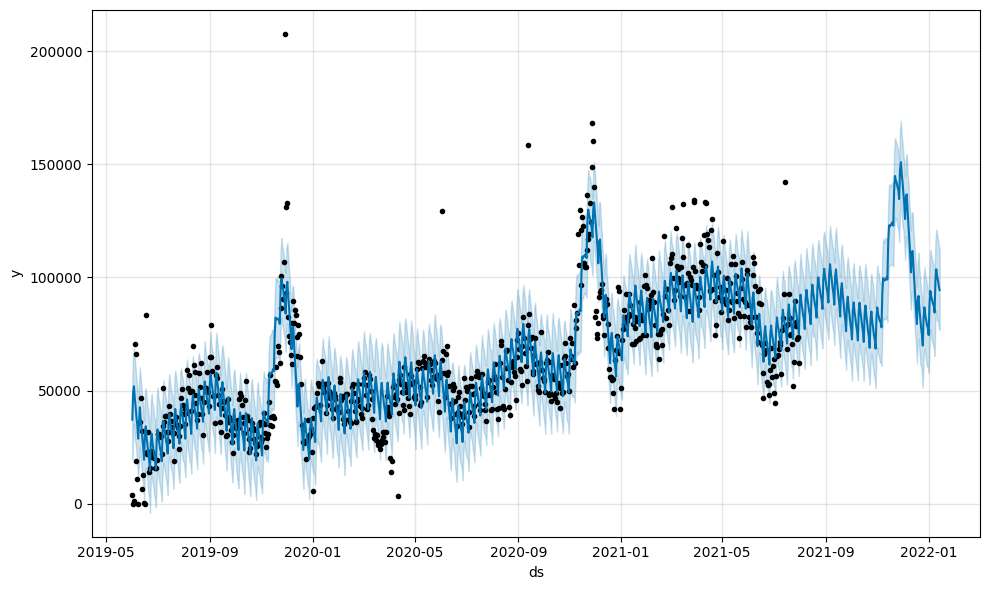

In [ ]:
# Plot the forecast
fig = model.plot(forecast)


In [ ]:
# Assuming your test set starts from '2021-08-01'
predicted_test = forecast[forecast['ds'] >= pd.Timestamp('2021-08-01')]
test = test.rename(columns={'ds': 'date'})
predicted_test = predicted_test.rename(columns={'ds': 'date'})

results = pd.merge(test, predicted_test[['date', 'yhat']], on='date')


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(results['y'], results['yhat'])
mse = mean_squared_error(results['y'], results['yhat'])

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')


Mean Absolute Error (MAE): 18375.266569951822
Mean Squared Error (MSE): 683121883.5197237


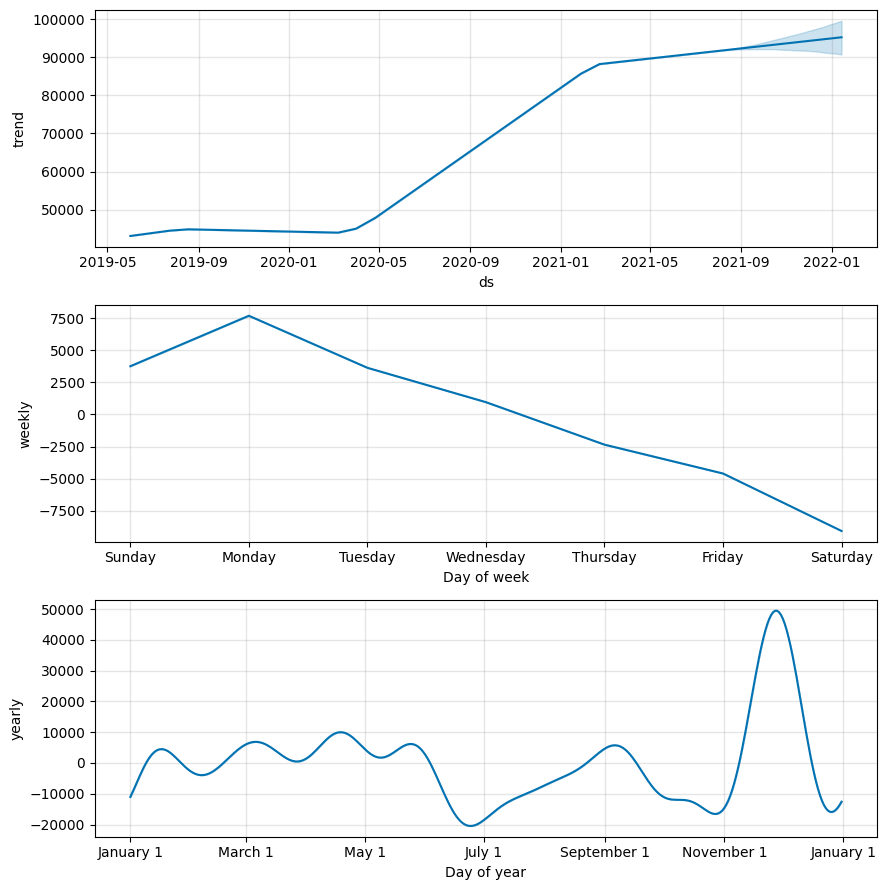

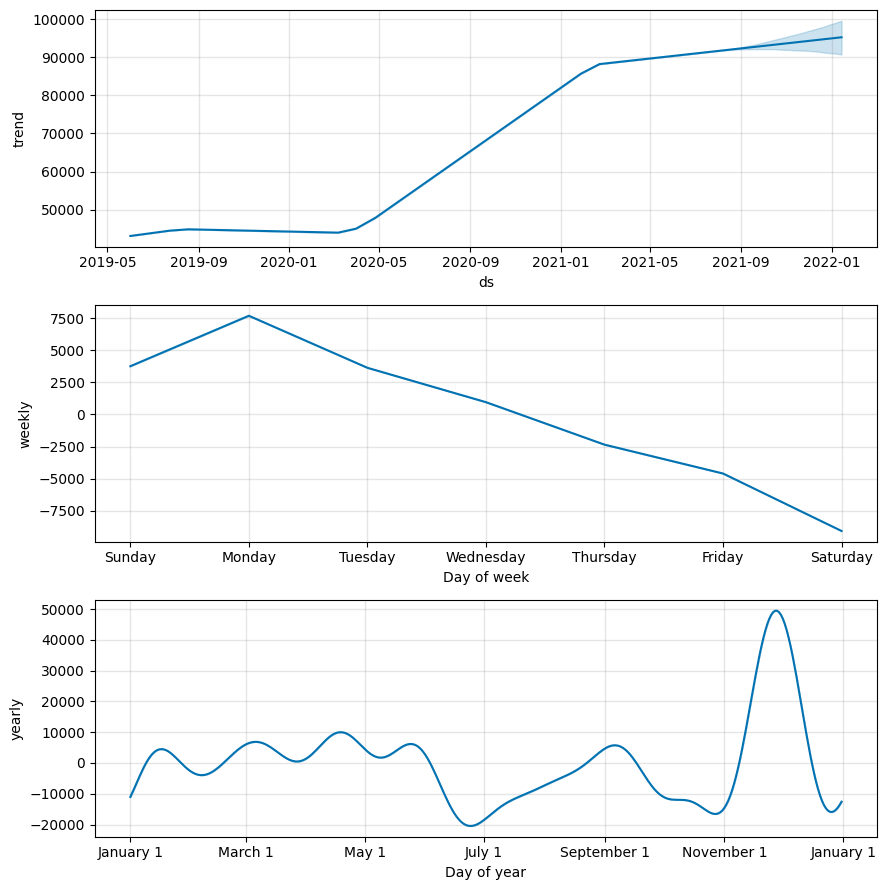

In [ ]:
# Visualize the trend and seasonality components
model.plot_components(forecast)

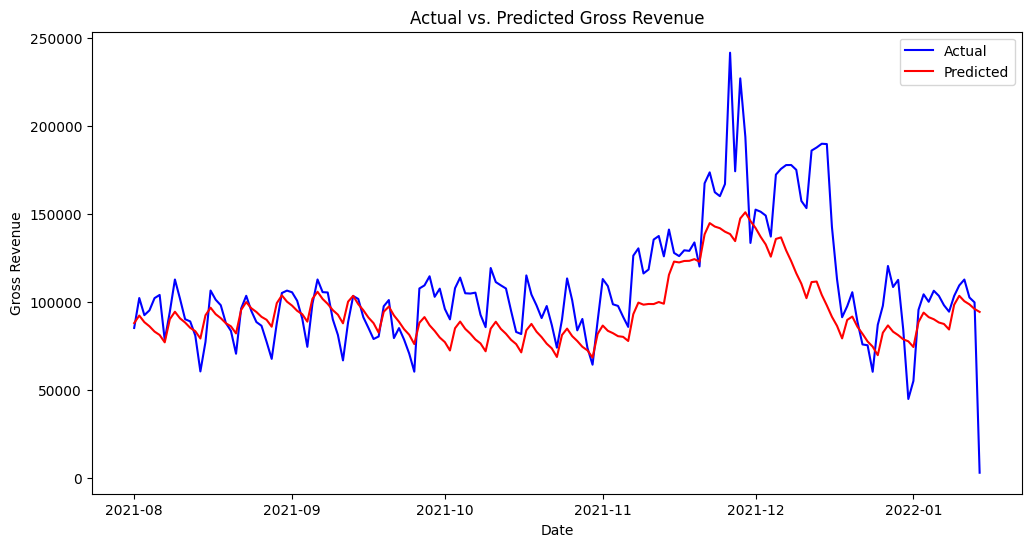

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(results['date'], results['y'], label='Actual', color='blue')
plt.plot(results['date'], results['yhat'], label='Predicted', color='red')

plt.xlabel('Date')
plt.ylabel('Gross Revenue')
plt.title('Actual vs. Predicted Gross Revenue')
plt.legend()

plt.show()


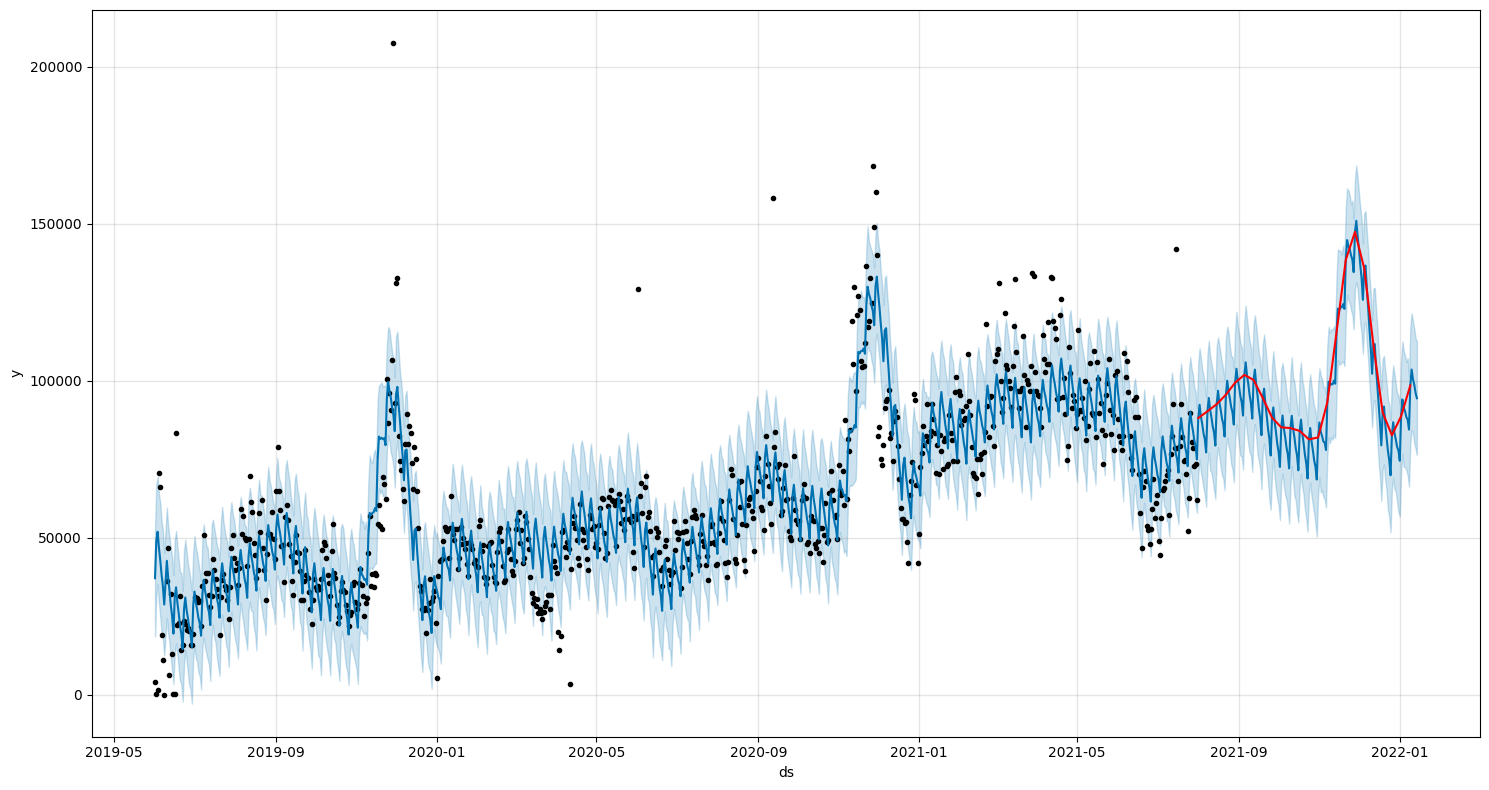

In [ ]:
 # comparing Forecast to Actual

f, ax=plt.subplots(1)
f.set_figheight(8)
f.set_figwidth(15)


fig=model.plot(forecast, ax=ax)
ax.plot(results['date'], results['yhat'], label='Predicted', color='red')

### Cross-Validation


In [ ]:
cutoffs=pd.to_datetime(['2021-08-01'])
#cutoffs=cutoffs
df_cv = cross_validation(m, initial='365.25 days', period='30 days', horizon = '240 days', parallel='processes')

In [ ]:
initial = pd.to_timedelta('365 days')
period = pd.to_timedelta('30 days')
horizon = pd.to_timedelta('90 days')


In [ ]:
cv_results = cross_validation(model, initial=initial, period=period, horizon=horizon)


INFO:prophet:Making 12 forecasts with cutoffs between 2020-06-06 00:00:00 and 2021-05-02 00:00:00


  0%|          | 0/12 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpf4e175qr/8dsbab2x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf4e175qr/ltlfit6s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63999', 'data', 'file=/tmp/tmpf4e175qr/8dsbab2x.json', 'init=/tmp/tmpf4e175qr/ltlfit6s.json', 'output', 'file=/tmp/tmpf4e175qr/prophet_models9wufbt_/prophet_model-20230421015530.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:55:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:55:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf4e175qr/chr4vauz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf4e175qr/z__grqrj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

In [ ]:
performance = performance_metrics(cv_results)
print(performance.head())


  horizon           mse          rmse           mae      mape     mdape  \
0  9 days  4.203005e+08  20501.232107  14673.429949  0.186226  0.144523   
1 10 days  4.636804e+08  21533.240215  15559.625289  0.194156  0.157089   
2 11 days  4.792655e+08  21892.133940  15964.357201  0.198570  0.162376   
3 12 days  4.879114e+08  22088.716240  15838.809108  0.194892  0.162376   
4 13 days  5.009411e+08  22381.713326  15972.895112  0.195580  0.164753   

      smape  coverage  
0  0.188214  0.666667  
1  0.198664  0.638889  
2  0.204052  0.620370  
3  0.200676  0.611111  
4  0.201689  0.611111  


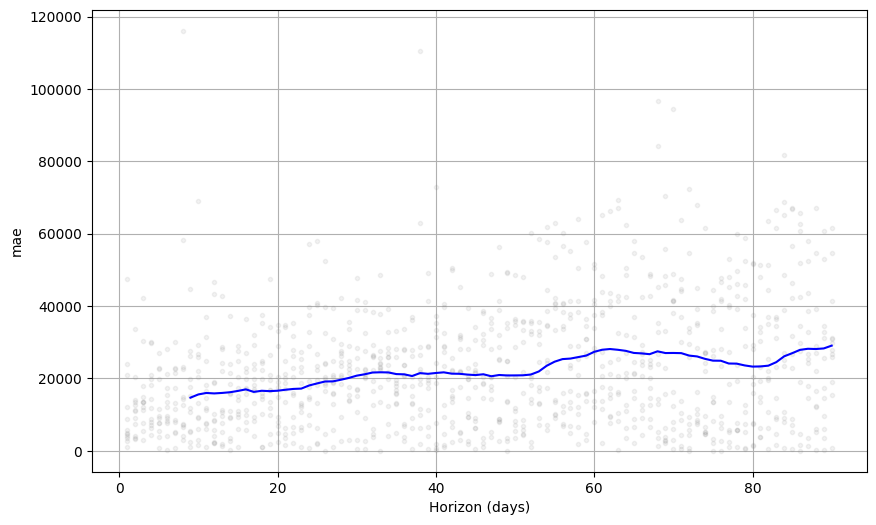

In [ ]:
fig = plot_cross_validation_metric(cv_results, metric='mae')
plt.show()
